## Overview

Let's build and RNN to prredicting stock price for Apple. The stock price of Apple was forecasted (or predicted) 7 days in advance.
The particular network architecture we will employ for our RNN is known as Long Term Short Memory (LTSM), which helps significantly avoid technical problems with optimization of RNNs.

In [1]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%load_ext autoreload
%autoreload 2


### load in and normalize the dataset
dataset = np.loadtxt('dataset/normalized_apple_prices.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


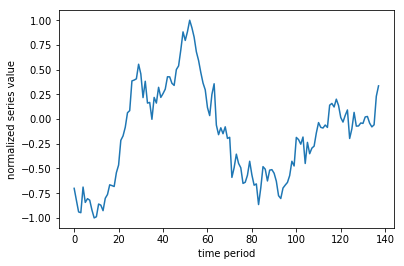

In [2]:
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

In [3]:
def window_transform_series(series, window_size):
    # containers for input/output pairs
    X = []
    y = []
    a = 0
    num_seq = len(series) - window_size;
    while (a < num_seq):
        X.append(series[a:window_size+a])
        a += 1
    y = series[window_size:]

    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)

    return X, y

In [4]:
window_size = 7
X,y = window_transform_series(series = dataset,window_size = window_size)

In [5]:

# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)

#Model Architecture... first layer is the LSTM layer followed by a Dense layer
model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

Using TensorFlow backend.


In [7]:
model.fit(X_train, y_train, epochs=1000, batch_size=200, verbose=0)

In [8]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [9]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0158838785507
testing error = 0.014451381014


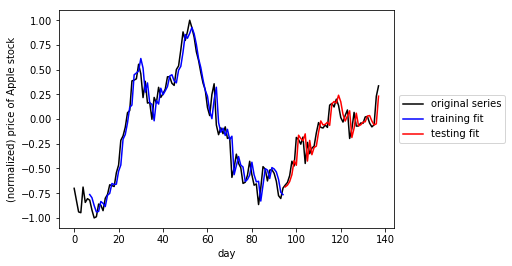

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [11]:
import os
os.getcwd()

'C:\\dev\\third-party\\saurav\\statistical-inferences'